# Predictions for At Fault Drivers- Phase 3 Project 
Angela Joseph-Pauline

## Overview

Using Logistic Modeling and DecisionTreeRegression to predict the possibility of a driver being at fault for car crashes i the Chicargo, IL area. The Data was provided by the Chicago, IL police department.

In [2]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#this allows plotsto appear directly in the notebook
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve, roc_curve, auc
from sklearn.base import BaseEstimator

### import DataFrame and clean data

In [3]:
df = pd.read_csv("Traffic_Crashes_-_Crashes.csv")
df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [4]:
#examine data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496491 entries, 0 to 496490
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                496491 non-null  object 
 1   RD_NO                          492845 non-null  object 
 2   CRASH_DATE_EST_I               37328 non-null   object 
 3   CRASH_DATE                     496491 non-null  object 
 4   POSTED_SPEED_LIMIT             496491 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         496491 non-null  object 
 6   DEVICE_CONDITION               496491 non-null  object 
 7   WEATHER_CONDITION              496491 non-null  object 
 8   LIGHTING_CONDITION             496491 non-null  object 
 9   FIRST_CRASH_TYPE               496491 non-null  object 
 10  TRAFFICWAY_TYPE                496491 non-null  object 
 11  LANE_CNT                       198965 non-null  float64
 12  ALIGNMENT                     

In [5]:
#change all column names to lower case
df.columns = [x.lower() for x in df.columns]
df.head()

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,...,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [6]:
#Check for null values
print(df.isnull().sum())

crash_record_id                       0
rd_no                              3646
crash_date_est_i                 459163
crash_date                            0
posted_speed_limit                    0
traffic_control_device                0
device_condition                      0
weather_condition                     0
lighting_condition                    0
first_crash_type                      0
trafficway_type                       0
lane_cnt                         297526
alignment                             0
roadway_surface_cond                  0
road_defect                           0
report_type                       12156
crash_type                            0
intersection_related_i           384435
not_right_of_way_i               473049
hit_and_run_i                    349519
damage                                0
date_police_notified                  0
prim_contributory_cause               0
sec_contributory_cause                0
street_no                             0


In [7]:
#Drop null values
df=df.dropna(axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496491 entries, 0 to 496490
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   crash_record_id          496491 non-null  object
 1   crash_date               496491 non-null  object
 2   posted_speed_limit       496491 non-null  int64 
 3   traffic_control_device   496491 non-null  object
 4   device_condition         496491 non-null  object
 5   weather_condition        496491 non-null  object
 6   lighting_condition       496491 non-null  object
 7   first_crash_type         496491 non-null  object
 8   trafficway_type          496491 non-null  object
 9   alignment                496491 non-null  object
 10  roadway_surface_cond     496491 non-null  object
 11  road_defect              496491 non-null  object
 12  crash_type               496491 non-null  object
 13  damage                   496491 non-null  object
 14  date_police_notified

In [9]:
#Confirm nulls have been dropped
print(df.isnull().sum())

crash_record_id            0
crash_date                 0
posted_speed_limit         0
traffic_control_device     0
device_condition           0
weather_condition          0
lighting_condition         0
first_crash_type           0
trafficway_type            0
alignment                  0
roadway_surface_cond       0
road_defect                0
crash_type                 0
damage                     0
date_police_notified       0
prim_contributory_cause    0
sec_contributory_cause     0
street_no                  0
num_units                  0
crash_hour                 0
crash_day_of_week          0
crash_month                0
dtype: int64


### Assign Driver responsibility

Assign values in columns prim_contributory_cause in order to determine if Driver is at fault.

Driver at fault = 1

Outside circumstances= 0

In [10]:
#check value count
df['prim_contributory_cause'].value_counts().to_dict()

{'UNABLE TO DETERMINE': 184177,
 'FAILING TO YIELD RIGHT-OF-WAY': 54473,
 'FOLLOWING TOO CLOSELY': 52427,
 'NOT APPLICABLE': 26650,
 'IMPROPER OVERTAKING/PASSING': 23572,
 'IMPROPER BACKING': 21669,
 'FAILING TO REDUCE SPEED TO AVOID CRASH': 21422,
 'IMPROPER LANE USAGE': 19136,
 'IMPROPER TURNING/NO SIGNAL': 16439,
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 15567,
 'DISREGARDING TRAFFIC SIGNALS': 9036,
 'WEATHER': 8529,
 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 6205,
 'DISREGARDING STOP SIGN': 5500,
 'DISTRACTION - FROM INSIDE VEHICLE': 3640,
 'EQUIPMENT - VEHICLE CONDITION': 3121,
 'PHYSICAL CONDITION OF DRIVER': 2915,
 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 2911,
 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 2647,
 'DRIVING ON WRONG SIDE/WRONG WAY': 2346,
 'DISTRACTION - FROM OUTSIDE VEHICLE': 2185,
 'EXCEEDING AUTHORIZED SPEED LIMIT': 1982,
 'EXCEEDING SAFE SPEED FOR CONDITIONS': 1684,
 'ROAD ENGINEER

In [11]:
#assigning values
num= {'UNABLE TO DETERMINE': 0,
 'FAILING TO YIELD RIGHT-OF-WAY': 1,
 'FOLLOWING TOO CLOSELY': 1,
 'NOT APPLICABLE': 0,
 'IMPROPER OVERTAKING/PASSING': 23572,
 'IMPROPER BACKING': 21669,
 'FAILING TO REDUCE SPEED TO AVOID CRASH': 21422,
 'IMPROPER LANE USAGE': 19136,
 'IMPROPER TURNING/NO SIGNAL': 16439,
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 15567,
 'DISREGARDING TRAFFIC SIGNALS': 9036,
 'WEATHER': 0,
 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 6205,
 'DISREGARDING STOP SIGN': 5500,
 'DISTRACTION - FROM INSIDE VEHICLE': 3640,
 'EQUIPMENT - VEHICLE CONDITION': 0,
 'PHYSICAL CONDITION OF DRIVER': 2915,
 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 0,
 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 2647,
 'DRIVING ON WRONG SIDE/WRONG WAY': 2346,
 'DISTRACTION - FROM OUTSIDE VEHICLE': 2185,
 'EXCEEDING AUTHORIZED SPEED LIMIT': 1982,
 'EXCEEDING SAFE SPEED FOR CONDITIONS': 1684,
 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 0,
 'ROAD CONSTRUCTION/MAINTENANCE': 0,
 'DISREGARDING OTHER TRAFFIC SIGNS': 1068,
 'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 0,
 'CELL PHONE USE OTHER THAN TEXTING': 697,
 'DISREGARDING ROAD MARKINGS': 677,
 'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 551,
 'ANIMAL': 0,
 'TURNING RIGHT ON RED': 349,
 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 235,
 'TEXTING': 215,
 'DISREGARDING YIELD SIGN': 187,
 'RELATED TO BUS STOP': 168,
 'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 66,
 'PASSING STOPPED SCHOOL BUS': 64,
 'OBSTRUCTED CROSSWALKS': 33,
 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 19}

In [12]:
#assign 1- to driver responsibility
for key in num.keys():
    if num[key]:
        num[key]=1

In [13]:
num

{'UNABLE TO DETERMINE': 0,
 'FAILING TO YIELD RIGHT-OF-WAY': 1,
 'FOLLOWING TOO CLOSELY': 1,
 'NOT APPLICABLE': 0,
 'IMPROPER OVERTAKING/PASSING': 1,
 'IMPROPER BACKING': 1,
 'FAILING TO REDUCE SPEED TO AVOID CRASH': 1,
 'IMPROPER LANE USAGE': 1,
 'IMPROPER TURNING/NO SIGNAL': 1,
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 1,
 'DISREGARDING TRAFFIC SIGNALS': 1,
 'WEATHER': 0,
 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 1,
 'DISREGARDING STOP SIGN': 1,
 'DISTRACTION - FROM INSIDE VEHICLE': 1,
 'EQUIPMENT - VEHICLE CONDITION': 0,
 'PHYSICAL CONDITION OF DRIVER': 1,
 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 0,
 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 1,
 'DRIVING ON WRONG SIDE/WRONG WAY': 1,
 'DISTRACTION - FROM OUTSIDE VEHICLE': 1,
 'EXCEEDING AUTHORIZED SPEED LIMIT': 1,
 'EXCEEDING SAFE SPEED FOR CONDITIONS': 1,
 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 0,
 'ROAD CONSTRUCTION/MAINTENANCE': 0,
 'DISREGAR

In [14]:
##apply new column to DataFrame
df['target']= df.prim_contributory_cause.map(num)

In [15]:
#check that it is in the DataFrame
df.head()

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,num_units,crash_hour,crash_day_of_week,crash_month,target
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,"OVER $1,500",07/10/2019 06:16:00 PM,IMPROPER BACKING,UNABLE TO DETERMINE,2158,2,17,4,7,1
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,"OVER $1,500",06/30/2017 04:01:00 PM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,8301,2,16,6,6,1
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,...,"OVER $1,500",07/10/2020 10:25:00 AM,FAILING TO YIELD RIGHT-OF-WAY,FAILING TO YIELD RIGHT-OF-WAY,1632,3,10,6,7,1
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,$500 OR LESS,07/11/2020 08:30:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,110,2,1,7,7,0
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,STRAIGHT AND LEVEL,...,"OVER $1,500",07/08/2020 02:15:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,412,2,14,4,7,0


## Check Class balance of Target Data

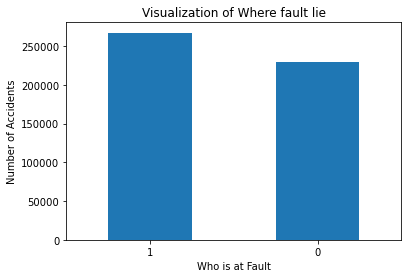

In [16]:
#Build a graph to visualize the data differnce between Drivers fault and Drivers not at fault

count_classes = pd.value_counts(df['target'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Visualization of Where fault lie")

plt.xticks(range(2))

plt.xlabel("Who is at Fault")

plt.ylabel("Number of Accidents")
plt.savefig('class_balance', dpi=300)

In [129]:
#Assign variables names to Target values

not_fault = df[df['target']==1]

fault = df[df['target']==0]

In [130]:
print(not_fault.shape, fault.shape)

(267174, 23) (229317, 23)


The Dataset shows that the dataset is pretty evenly distributed with a small bias to false positives. The difference between the Driver at fault, fault, and outside circumstances, not_fault, is 37,857.

## Train and Model data

Train the data and apply the X values to the DataFrame's numeric values then check cross validation.

In [132]:
#Check that data is uniform
df.dtypes

crash_record_id            object
crash_date                 object
posted_speed_limit          int64
traffic_control_device     object
device_condition           object
weather_condition          object
lighting_condition         object
first_crash_type           object
trafficway_type            object
alignment                  object
roadway_surface_cond       object
road_defect                object
crash_type                 object
damage                     object
date_police_notified       object
prim_contributory_cause    object
sec_contributory_cause     object
street_no                   int64
num_units                   int64
crash_hour                  int64
crash_day_of_week           int64
crash_month                 int64
target                      int64
dtype: object

In [133]:
#drop unneeded columns
drop= ['crash_record_id',
'crash_date',
'first_crash_type',      
'crash_type',
'date_police_notified',
'prim_contributory_cause',
'sec_contributory_cause',
'street_no']
df= df.drop(drop, axis=1)

In [147]:
#train data
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [148]:
#seporate numerical features
num_feats = DummyClassifier(strategy= 'most_frequent')
X_train_numeric = X_train[['posted_speed_limit',   
                           'num_units',   
                             'crash_hour', 
                           'crash_day_of_week', 'crash_month', ]].copy()

In [149]:
num_feats = DummyClassifier(strategy= 'most_frequent')
X_test_numeric = X_test[['posted_speed_limit',   
                           'num_units',   
                             'crash_hour', 
                           'crash_day_of_week', 'crash_month', ]].copy()

In [137]:
#check cross validation score of numerical features
num_cross_val_score = cross_val_score(num_feats, X_train_numeric, y_train, cv=5)
num_cross_val_score

array([0.53746274, 0.53746274, 0.53744931, 0.53745653, 0.53745653])

### Scaling Data

Scale data then model the data to preform a logistic Regression model. Finally, check the predictivity score of the model.

In [ ]:
log_reg_model = LogisticRegression()

In [150]:
#fit and transform trained data into scaled data.
scaler= StandardScaler()
X_train_scaled=X_train_numeric.copy()
scaler.fit(X_train_scaled)
X_train_scaled=scaler.transform(X_train_scaled)

In [151]:
#scaled logestical regession model
num_cross_val_score = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=5)
num_cross_val_score

array([0.56822515, 0.56657357, 0.56857427, 0.5686759 , 0.56903844])

In [158]:
log_reg_model= LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [197]:
log_reg_model.predict_proba(X_train_scaled)

array([[0.45827858, 0.54172142],
       [0.46637025, 0.53362975],
       [0.55293695, 0.44706305],
       ...,
       [0.47047336, 0.52952664],
       [0.48431316, 0.51568684],
       [0.41606071, 0.58393929]])

In [178]:
log_reg_model.score(X_train_scaled, y_train)

0.5682040347183431

The accuracy score shows that this model is predictive up to about 56%. The use of the numerical features allow us to predict the probability of a Driver at fault by more than half. The next steps is to add the categorical features to see if they will increase the odds ratio.

### OneHotEncode Categorical Data for logistical Regression

In [159]:
#find the Categorical Data
X_train.dtypes

posted_speed_limit         int64
traffic_control_device    object
device_condition          object
weather_condition         object
lighting_condition        object
trafficway_type           object
alignment                 object
roadway_surface_cond      object
road_defect               object
damage                    object
num_units                  int64
crash_hour                 int64
crash_day_of_week          int64
crash_month                int64
dtype: object

In [160]:
#fit and transform categoricals
categoricals = X_train.select_dtypes('object')
categorical_names = categoricals.columns
ohe = OneHotEncoder(sparse= False)
ohe.fit(categoricals)
categorical_ohe= ohe.transform(categoricals)

categorical_ohe=pd.DataFrame(categorical_ohe, columns= ohe.get_feature_names())

In [161]:
#drop and concat categorical data
X_train= X_train.reset_index()
X_train= X_train.drop(categorical_names, axis= 1)
X_train_ohe= pd.concat([X_train, categorical_ohe], axis= 1)


In [162]:
#confirm it worked
X_train_ohe.head()

,index,posted_speed_limit,num_units,crash_hour,crash_day_of_week,crash_month,x0_BICYCLE CROSSING SIGN,x0_DELINEATORS,x0_FLASHING CONTROL SIGNAL,x0_LANE USE MARKING,...,x7_DEBRIS ON ROADWAY,x7_NO DEFECTS,x7_OTHER,"x7_RUT, HOLES",x7_SHOULDER DEFECT,x7_UNKNOWN,x7_WORN SURFACE,x8_$500 OR LESS,"x8_$501 - $1,500","x8_OVER $1,500"
0,45171,35,2,8,2,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,198424,30,2,7,2,12,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,231653,10,2,13,7,10,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,19472,30,2,19,6,3,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,390007,30,2,5,4,6,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [185]:
#Preform a logistical model with ohe
log_model = LogisticRegression()

print("Old:", num_cross_val_score)
print("New:", cross_val_score(log_model, X_train_ohe, y_train, cv=5))

Old: [0.56822515 0.56657357 0.56857427 0.5686759  0.56903844]
New: [0.53746274 0.53746274 0.53744931 0.53745653 0.53745653]


In [186]:
log_model= LogisticRegression(random_state=0).fit(X_train_ohe, y_train)

In [187]:
log_model.predict_proba(X_train_ohe)

array([[0.4942098 , 0.5057902 ],
       [0.47458601, 0.52541399],
       [0.47033934, 0.52966066],
       ...,
       [0.48309412, 0.51690588],
       [0.48118206, 0.51881794],
       [0.48437133, 0.51562867]])

In [195]:
log_model.score(X_train_ohe, y_train)

0.537457568856615

The addition of the categorical feature did not help the model as expected. The accurscry score fell by about 3%. We will try a different predictive model to see if that will help or accuracy score. We will use the Decision Tree Regression Model. 

### DecisionTreeRegressor Model

In [168]:
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()


print("Old:", num_cross_val_score)
print("New:", cross_val_score(clf, X_train_ohe, y_train, cv=5))


Old: [0.56822515 0.56657357 0.56857427 0.5686759  0.56903844]
New: [0.55166904 0.5491581  0.5510648  0.5524284  0.55037396]


In [169]:
clf_model= clf.fit(X_train_ohe, y_train, sample_weight=None, check_input=True, X_idx_sorted='deprecated')

In [172]:
clf.predict_proba(X_train_ohe, check_input=True)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [173]:
clf.score(X_train_ohe, y_train, sample_weight=None)

1.0

The DecisionTreeRegressor Model provided an accuracy score of about 55%. This is about 1% less from the original model but better then the model that included the categoricals.

## Conclusion

In conclusion, the best features for predicting a crash in Chicargo, IL were the numerical features. The features such as speed limit and time of day, had an accurancy of about 57% . Categorical features could predict a crash more then half the time but it is still less then that of the numerical features, categorical features can predict the crashes about 54% of the time. Furthermore, The  DecisionTreeRegressor model was a better indicator then the logistical model that included the categoricals but it was still about 1% less then the original logistical model that only included that numerical model. 